<a href="https://colab.research.google.com/github/umesh-thatikonda/MissionRnD_python-course/blob/master/802ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random as rnd
import plotly.express as px
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv(r'/content/abalone.csv')

In [ ]:
# Changing the column names for better readability
newCols = list(map(lambda x : x.lower().replace(' ', '_'), df.columns))

df.columns = newCols

In [ ]:
df.info() # Checking the columns meta deta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# CHecking for null values


df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [ ]:
# Creation of age feature as directed in the assignment questions.
# add 1.5 to the rings count to get the age

df['Age'] = df['rings'] + 1.5
 
df.drop('rings', inplace=True, axis=1) # Dropping rings feature as we have extracted age out from rings columns

In [ ]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


It is observed that the minimum value for height is zero, which is most probably due to an error while data collection activity. We will investigate this in the next steps and take appropriate measures

In [ ]:
df[df['height']==0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two records with height as zero this is definitely a error as diameter, wieghts are non zero. They can be dropped or the height can be replaced with median or median after checking the distribution of the height column

In [ ]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# see the distibution of hieghts information
fig = px.histogram(df, x="height", title="Distribution of height" )
fig.show()

##### After closly observing the distribution of the height data, which is nearly normal distributed. The zero height records can be replaced with mean of the height columns

In [ ]:
df['height'][df['height'] == 0]=df.height.mean() # Replacing zero height with mean of height

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Univaraite Analysis

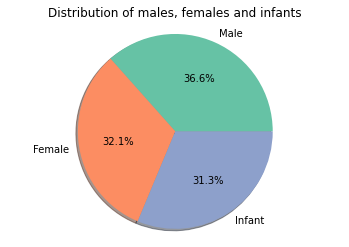

In [ ]:
# pie chart of workers
labels = ['Male', 'Female', 'Infant']
sizes = df.sex.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title("Distribution of males, females and infants")
plt.show()

It is observed that the count of males, females and infants are almost equal, there is no clear domination of a specific gender types in the data

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Height', "Whiscker plot for  height"))
fig.add_trace(go.Histogram(x=df['height']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['height'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Height')
    
    , row=1, col=2)

fig.show()


After looking at the distribution of the data and the box plot we can observe that the data is nearly normally distributed, has little outliers

In [ ]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for lenght', "Whiscker plot for  length"))
fig.add_trace(go.Histogram(x=df['length']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='length')
    
    , row=1, col=2)

fig.show()


The feature length, We observe that the data is left skewed and has few outliers

In [ ]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for diameter', "Whiscker plot for  diameter"))
fig.add_trace(go.Histogram(x=df['diameter']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['diameter'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Diameter measuremnet')
    
    , row=1, col=2)

fig.show()


For the feature "Diameter", the data is nominally left skewed and by observing the whisker plot, we can confirm that it is having no outliers. Therefore might not have a negative impact on the statistical modelling built using the data

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Age', "Whiscker plot for  Age"))
fig.add_trace(go.Histogram(x=df['Age']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['Age'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age')
    
    , row=1, col=2)

fig.show()


The Response variable "Age", almost closelt normal distributed has skewness towards right side but not significance though. We shall investigate this more in the further process